# Rossmann Store Sales

## 1. Problem Definition
In a statement,
> Forcast the Sales column using Store, Promotion and Competitor Data.

## 2. Data
The original data came from a kaggle competition https://www.kaggle.com/c/rossmann-store-sales/data

There are 3 main datasets:

* train.csv - historical data including Sales
* test.csv - historical data excluding Sales
* store.csv - supplemental information about the stores


## 3. Evaluation
The evaluation metric for this competition is the RMSPE (Root Mean Square Percentage Error).

For more on the evaluation of this project check: https://www.kaggle.com/c/rossmann-store-sales/overview/evaluation

## 4. Features
Here, we get to see different information about each of the features in the data. I looked up some of the definition online.

**Data fields**

* Id - an Id that represents a (Store, Date) duple within the test set
* Store - a unique Id for each store
* Sales - the turnover for any given day (this is what you are predicting)
* Customers - the number of customers on a given day
* Open - an indicator for whether the store was open: 0 = closed, 1 = open
* StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* StoreType - differentiates between 4 different store models: a, b, c, d
* Assortment - describes an assortment level: a = basic, b = extra, c = extended
* CompetitionDistance - distance in meters to the nearest competitor store
* CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* Promo - indicates whether a store is running a promo on that day
* Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Our train dataset
train_data = pd.read_csv("train.csv")
train_data.head()

C:\Users\oabas\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
# The store dataset
store_data = pd.read_csv("store.csv")
store_data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [5]:
# Merging the train and store details data based on store number to get complete info for each store
combined_data = pd.merge(train_data, store_data, on="Store")
combined_data.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
5,1,7,2015-07-26,0,0,0,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
6,1,6,2015-07-25,4364,500,1,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
7,1,5,2015-07-24,3706,459,1,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
8,1,4,2015-07-23,3769,503,1,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
9,1,3,2015-07-22,3464,463,1,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [6]:
combined_data.shape

(1017209, 18)

In [7]:
combined_data.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

In [8]:
# Unique values in dataset
columns = list(combined_data.columns)
columns.remove("Date")
columns.remove("CompetitionDistance")
for col in columns:
    print(col,"-------->",combined_data[col].unique())

Store --------> [   1    2    3 ... 1113 1114 1115]
DayOfWeek --------> [5 4 3 2 1 7 6]
Sales --------> [ 5263  5020  4782 ... 20362 18841 21237]
Customers --------> [ 555  546  523 ... 3727 4022 4106]
Open --------> [1 0]
Promo --------> [1 0]
StateHoliday --------> ['0' 'a' 'b' 'c' 0]
SchoolHoliday --------> [1 0]
StoreType --------> ['c' 'a' 'd' 'b']
Assortment --------> ['a' 'c' 'b']
CompetitionOpenSinceMonth --------> [ 9. 11. 12.  4. 10.  8. nan  3.  6.  5.  1.  2.  7.]
CompetitionOpenSinceYear --------> [2008. 2007. 2006. 2009. 2015. 2013. 2014. 2000. 2011.   nan 2010. 2005.
 1999. 2003. 2012. 2004. 2002. 1961. 1995. 2001. 1990. 1994. 1900. 1998.]
Promo2 --------> [0 1]
Promo2SinceWeek --------> [nan 13. 14.  1. 45. 40. 26. 22.  5.  6. 10. 31. 37.  9. 39. 27. 18. 35.
 23. 48. 36. 50. 44. 49. 28.]
Promo2SinceYear --------> [  nan 2010. 2011. 2012. 2009. 2014. 2015. 2013.]
PromoInterval --------> [nan 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']


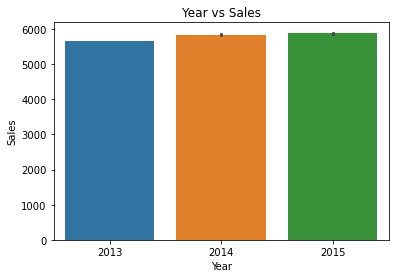

In [9]:
# Extracting year and month from Date
combined_data['Year'] = combined_data['Date'].apply(lambda x: int(str(x)[:4]))
combined_data['Month'] = combined_data['Date'].apply(lambda x: int(str(x)[5:7]))

# Sales with respect to year
sns.barplot(x='Year', y='Sales', data=combined_data).set(title="Year vs Sales")
plt.show()

**Sales has been increasing year to year**

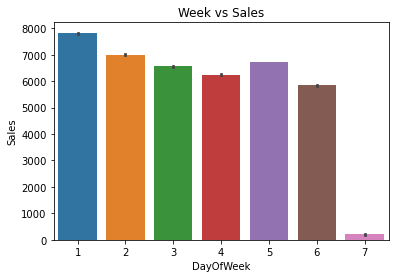

In [10]:
# Sales with respect to week
sns.barplot(x='DayOfWeek', y='Sales', data=combined_data).set(title='Week vs Sales')
plt.show()

**Sales on 1 (Monday), 2 (Tuesday) and 5 (Friday) are the highest**

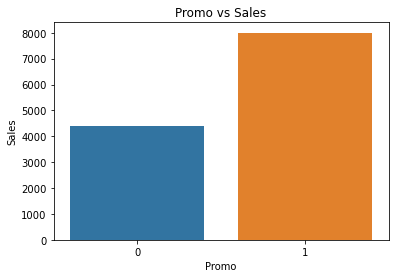

In [11]:
# Sales with respect to Promo
sns.barplot(x='Promo', y='Sales', data=combined_data).set(title='Promo vs Sales')
plt.show()

**Customers are definately attracted by Promo codes thus sales are higher when there is a Promo code in a Store**

C:\Users\oabas\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


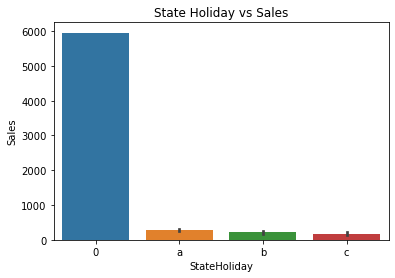

In [12]:
# StateHoliday column has values 0 & "0", So, we need to change values with 0 to "0"
combined_data["StateHoliday"].loc[combined_data["StateHoliday"] == 0] = "0"

# Sales with respect to State Holiday
sns.barplot(x='StateHoliday', y='Sales', data=combined_data).set(title='State Holiday vs Sales')
plt.show()

**Most stores are closed on State Holidays that's why we can see that there are very less sales in a,b,c where:**
* a = Public Holiday
* b = Easter Holiday
* c = Chirstmas
* 0 = No Holiday, Working day

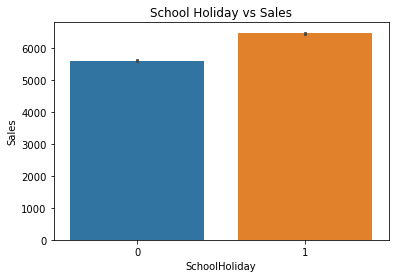

In [13]:
# Sales with respect to School Holiday
sns.barplot(x='SchoolHoliday', y='Sales', data=combined_data).set(title='School Holiday vs Sales')
plt.show()

**On School Holidays there are more sales!**

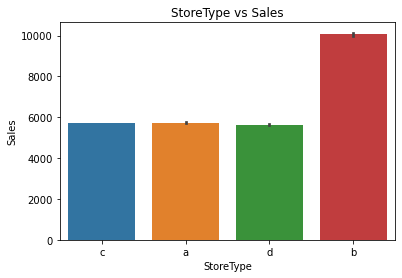

In [14]:
# Sales with respect to StoreType
sns.barplot(x='StoreType', y='Sales', data=combined_data).set(title='StoreType vs Sales')
plt.show()

**a,b,c,d are store models where b type stores have the highest sales**

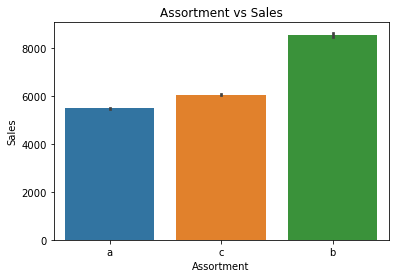

In [15]:
# Sales with respect to Assortment
sns.barplot(x='Assortment', y='Sales', data=combined_data).set(title='Assortment vs Sales')
plt.show()

**Assortment level b have the highest sales
Assortment levels:**
* a = basic
* b = extra
* c = entended

## Filling Missing Values and Removing Outliers

Few columns have high number of missing values, so we need to fill them with appropriate method for better result

### Filling Missing Values

In [17]:
train_data.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [16]:
store_data.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [20]:
# Filling Promo2SinceWeek, Promo2SinceYear, PromoInterval with 0
store_data.update(store_data[['Promo2SinceWeek','Promo2SinceYear','PromoInterval']].fillna(0))

In [21]:
# Filling CompetitionDistance with mean distance
mean_competition_distance = store_data['CompetitionDistance'].mean()

store_data['CompetitionDistance'].fillna(mean_competition_distance, inplace=True)

In [22]:
# Filling CompetitionOpenSinceMonth, CompetitionOpenSinceYear with most occuring month and year respectively
mode_competition_open_month = store_data['CompetitionOpenSinceMonth'].mode()[0]
mode_competition_open_year = store_data['CompetitionOpenSinceYear'].mode()[0]

store_data['CompetitionOpenSinceMonth'].fillna(mode_competition_open_month, 
                                               inplace=True)

store_data['CompetitionOpenSinceYear'].fillna(mode_competition_open_year, 
                                              inplace=True)

In [23]:
store_data.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [24]:
combined_data = pd.merge(train_data, store_data, on="Store")
combined_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


In [26]:
combined_data.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

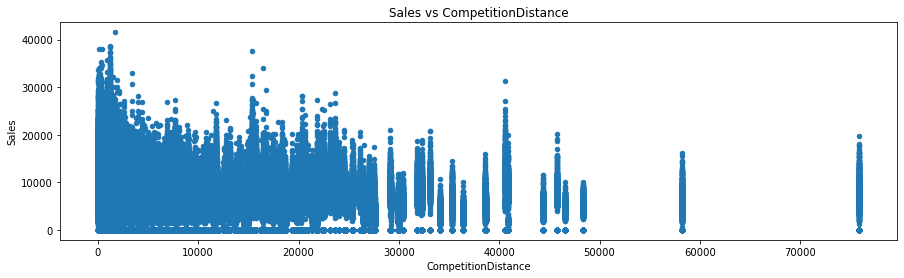

In [28]:
combined_data.plot(kind='scatter', 
                   x='CompetitionDistance', 
                   y='Sales', 
                   figsize=(15,4), 
                   title="Sales vs CompetitionDistance");

`CompetitionDistance` is the distance in meters to the nearest competitor store, the more nearer the two stores are the more sales can be seen

### Finding Outliers

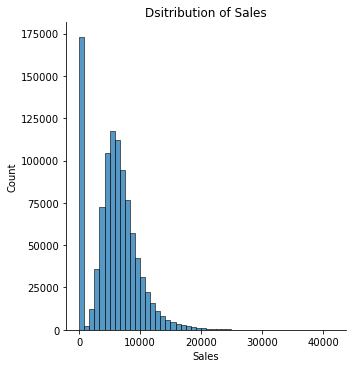

In [31]:
# Checking distribution of sales
sns.displot(combined_data, x="Sales", bins=50).set(title='Dsitribution of Sales');

As we can see in the distribution plot Sales greater than 30k are very less so they might be the outliers